# DISKRITISASI

Data binning atau bucketing adalah metode pra-pemrosesan data yang digunakan untuk mengurangi dampak kesalahan pengamatan. Nilai data asli dibagi ke dalam interval-interval kecil yang disebut bin, lalu nilai-nilai tersebut digantikan oleh suatu nilai umum yang dihitung untuk setiap bin tersebut. Metode ini memiliki efek menghaluskan (smoothing) pada data masukan dan juga dapat mengurangi risiko overfitting terutama pada kasus dataset yang kecil.

In [2]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00


## Bagian Awal: Ambil dan Gabungkan Data

Kode Python ini terhubung ke dua database berbeda—PostgreSQL dan MySQL—menggunakan pustaka psycopg2 dan pymysql, lalu mengambil data dari tabel sepaliris (PostgreSQL) dan petaliris (MySQL). Data dari kedua tabel tersebut dimuat ke dalam DataFrame menggunakan pandas, kemudian digabungkan berdasarkan kolom id dan class dengan metode inner join, yang berarti hanya data yang memiliki kecocokan di kedua tabel pada kolom tersebut yang akan disertakan. Setelah penggabungan, hasil akhir ditampilkan di konsol tanpa menampilkan indeks baris. Kode ini memungkinkan analisis gabungan data kelopak dan sepal dari dua sumber database yang berbeda.

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Tampilkan hanya kolom id, class, dan sepal_length
print(df_merged[["id", "class", "sepal_length"]].to_string(index=False))


 id           class  sepal_length
  1     Iris-setosa           5.1
  2     Iris-setosa           4.9
  3     Iris-setosa           4.7
  4     Iris-setosa           4.6
  5     Iris-setosa           5.0
  6     Iris-setosa           5.4
  7     Iris-setosa           4.6
  8     Iris-setosa           5.0
  9     Iris-setosa           4.4
 10     Iris-setosa           4.9
 11     Iris-setosa           5.4
 12     Iris-setosa           4.8
 13     Iris-setosa           4.8
 14     Iris-setosa           4.3
 15     Iris-setosa           5.8
 16     Iris-setosa           5.7
 17     Iris-setosa           5.4
 18     Iris-setosa           5.1
 19     Iris-setosa           5.7
 20     Iris-setosa           5.1
 21     Iris-setosa           5.4
 22     Iris-setosa           5.1
 23     Iris-setosa           4.6
 24     Iris-setosa           5.1
 25     Iris-setosa           4.8
 26     Iris-setosa           5.0
 27     Iris-setosa           5.0
 28     Iris-setosa           5.2
 29     Iris-s

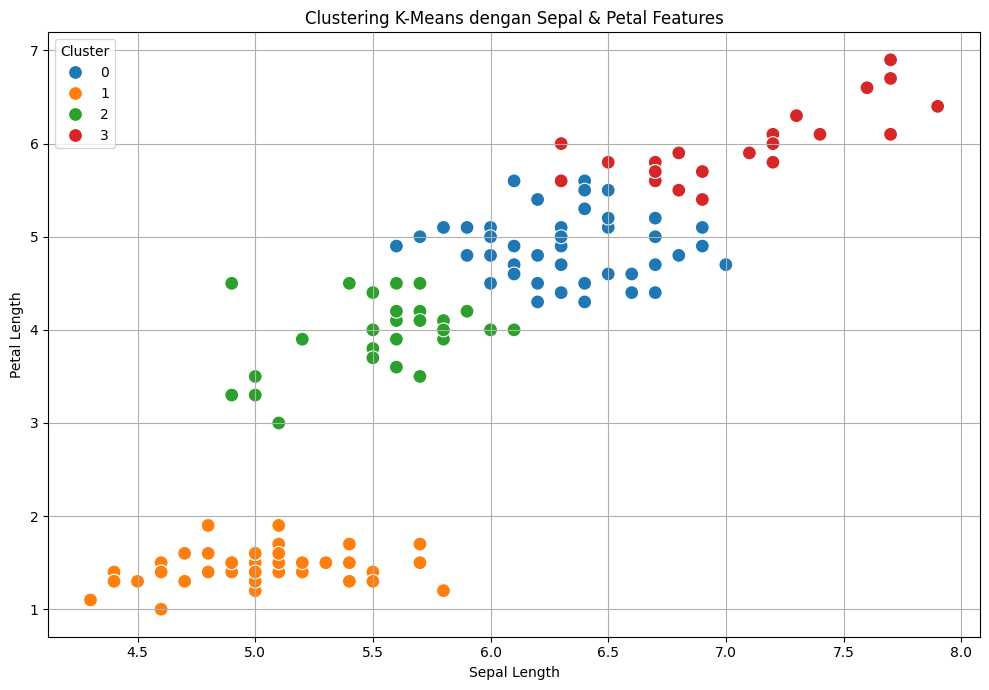

 id           class  sepal_length  sepal_width  petal_length  petal_width
  1     Iris-setosa           5.1          3.5           1.4          0.2
  2     Iris-setosa           4.9          3.0           1.4          0.2
  3     Iris-setosa           4.7          3.2           1.3          0.2
  4     Iris-setosa           4.6          3.1           1.5          0.2
  5     Iris-setosa           5.0          3.6           1.4          0.2
  6     Iris-setosa           5.4          3.9           1.7          0.4
  7     Iris-setosa           4.6          3.4           1.4          0.3
  8     Iris-setosa           5.0          3.4           1.5          0.2
  9     Iris-setosa           4.4          2.9           1.4          0.2
 10     Iris-setosa           4.9          3.1           1.5          0.1
 11     Iris-setosa           5.4          3.7           1.5          0.2
 12     Iris-setosa           4.8          3.4           1.6          0.2
 13     Iris-setosa           4.8     

In [11]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# =========================
# FUNGSI AMBIL DATA
# =========================

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# =========================
# GABUNG DATA
# =========================

df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# =========================
# CLUSTERING K-MEANS (4 CLUSTER)
# =========================

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = df_merged[features]

kmeans = KMeans(n_clusters=4, random_state=42)
df_merged["cluster"] = kmeans.fit_predict(X)

# =========================
# VISUALISASI CLUSTERING
# =========================

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_merged,
    x="sepal_length", y="petal_length",
    hue="cluster", palette="tab10", s=100
)
plt.title("Clustering K-Means dengan Sepal & Petal Features")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# =========================
# CETAK DATA (TANPA KOLOM CLUSTER)
# =========================

print(df_merged[["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]].to_string(index=False))


In [6]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# =========================
# CLUSTERING SEPAL_LENGTH
# =========================
kmeans_length = KMeans(n_clusters=4, random_state=42)
df_merged["sepal_length_cluster"] = kmeans_length.fit_predict(df_merged[["sepal_length"]])
cluster_labels = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
df_merged["sepal_length_cluster"] = df_merged["sepal_length_cluster"].map(cluster_labels)

# =========================
# CLUSTERING SEPAL_WIDTH
# =========================
kmeans_width = KMeans(n_clusters=4, random_state=42)
df_merged["sepal_width_cluster"] = kmeans_width.fit_predict(df_merged[["sepal_width"]])
df_merged["sepal_width_cluster"] = df_merged["sepal_width_cluster"].map(cluster_labels)

# =========================
# CETAK DATA DENGAN KATEGORI
# =========================
df_merged.rename(columns={
    "sepal_length_cluster": "Sepal_Length",
    "sepal_width_cluster": "Sepal_Width"
}, inplace=True)

print(df_merged[["id", "class", "Sepal_Length", "Sepal_Width"]].to_string(index=False))


 id           class Sepal_Length Sepal_Width
  1     Iris-setosa            c           a
  2     Iris-setosa            c           c
  3     Iris-setosa            c           a
  4     Iris-setosa            c           a
  5     Iris-setosa            c           d
  6     Iris-setosa            b           d
  7     Iris-setosa            c           a
  8     Iris-setosa            c           a
  9     Iris-setosa            c           c
 10     Iris-setosa            c           a
 11     Iris-setosa            b           d
 12     Iris-setosa            c           a
 13     Iris-setosa            c           c
 14     Iris-setosa            c           c
 15     Iris-setosa            b           d
 16     Iris-setosa            b           d
 17     Iris-setosa            b           d
 18     Iris-setosa            c           a
 19     Iris-setosa            b           d
 20     Iris-setosa            c           d
 21     Iris-setosa            b           a
 22     Ir

In [7]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Mapping cluster angka ke huruf
cluster_labels = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# =========================
# CLUSTERING SEPAL_LENGTH
# =========================
kmeans_length = KMeans(n_clusters=4, random_state=42)
df_merged["Sepal_Length"] = kmeans_length.fit_predict(df_merged[["sepal_length"]])
df_merged["Sepal_Length"] = df_merged["Sepal_Length"].map(cluster_labels)

# =========================
# CLUSTERING SEPAL_WIDTH
# =========================
kmeans_width = KMeans(n_clusters=4, random_state=42)
df_merged["Sepal_Width"] = kmeans_width.fit_predict(df_merged[["sepal_width"]])
df_merged["Sepal_Width"] = df_merged["Sepal_Width"].map(cluster_labels)

# =========================
# CLUSTERING PETAL_LENGTH
# =========================
kmeans_petal_length = KMeans(n_clusters=4, random_state=42)
df_merged["Petal_Length"] = kmeans_petal_length.fit_predict(df_merged[["petal_length"]])
df_merged["Petal_Length"] = df_merged["Petal_Length"].map(cluster_labels)

# =========================
# CLUSTERING PETAL_WIDTH
# =========================
kmeans_petal_width = KMeans(n_clusters=4, random_state=42)
df_merged["Petal_Width"] = kmeans_petal_width.fit_predict(df_merged[["petal_width"]])
df_merged["Petal_Width"] = df_merged["Petal_Width"].map(cluster_labels)

# =========================
# CETAK DATA KATEGORI LENGKAP
# =========================
print(df_merged[["id", "class", "Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].to_string(index=False))


 id           class Sepal_Length Sepal_Width Petal_Length Petal_Width
  1     Iris-setosa            c           a            b           b
  2     Iris-setosa            c           c            b           b
  3     Iris-setosa            c           a            b           b
  4     Iris-setosa            c           a            b           b
  5     Iris-setosa            c           d            b           b
  6     Iris-setosa            b           d            b           b
  7     Iris-setosa            c           a            b           b
  8     Iris-setosa            c           a            b           b
  9     Iris-setosa            c           c            b           b
 10     Iris-setosa            c           a            b           b
 11     Iris-setosa            b           d            b           b
 12     Iris-setosa            c           a            b           b
 13     Iris-setosa            c           c            b           b
 14     Iris-setosa 

## Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means
 ### lakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan K-Means, untuk mencari akurasi data iris

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ambil fitur dan target
X = df_merged[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df_merged["class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diskretisasi dengan metode: 'kmeans', 'uniform' (equal width), 'quantile' (equal frequency)
def run_discretized_nb(strategy, n_bins=4):
    print(f"\n=== Klasifikasi Naive Bayes - Diskretisasi: {strategy.upper()} ===")

    kb = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_train_discrete = kb.fit_transform(X_train)
    X_test_discrete = kb.transform(X_test)

    model = CategoricalNB()
    model.fit(X_train_discrete, y_train)
    y_pred = model.predict(X_test_discrete)

    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Jalankan ketiga metode
run_discretized_nb("kmeans")
run_discretized_nb("uniform")       # Equal Width
run_discretized_nb("quantile")      # Equal Frequency



=== Klasifikasi Naive Bayes - Diskretisasi: KMEANS ===
Akurasi: 0.9333333333333333
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30


=== Klasifikasi Naive Bayes - Diskretisasi: UNIFORM ===
Akurasi: 0.9666666666666667
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97     

### lakukan klasifikasi Decision Tree pada data iris hasil diskritisasi menggunakan K-Means, untuk mencari akurasi data iris

Akurasi: 1.0

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



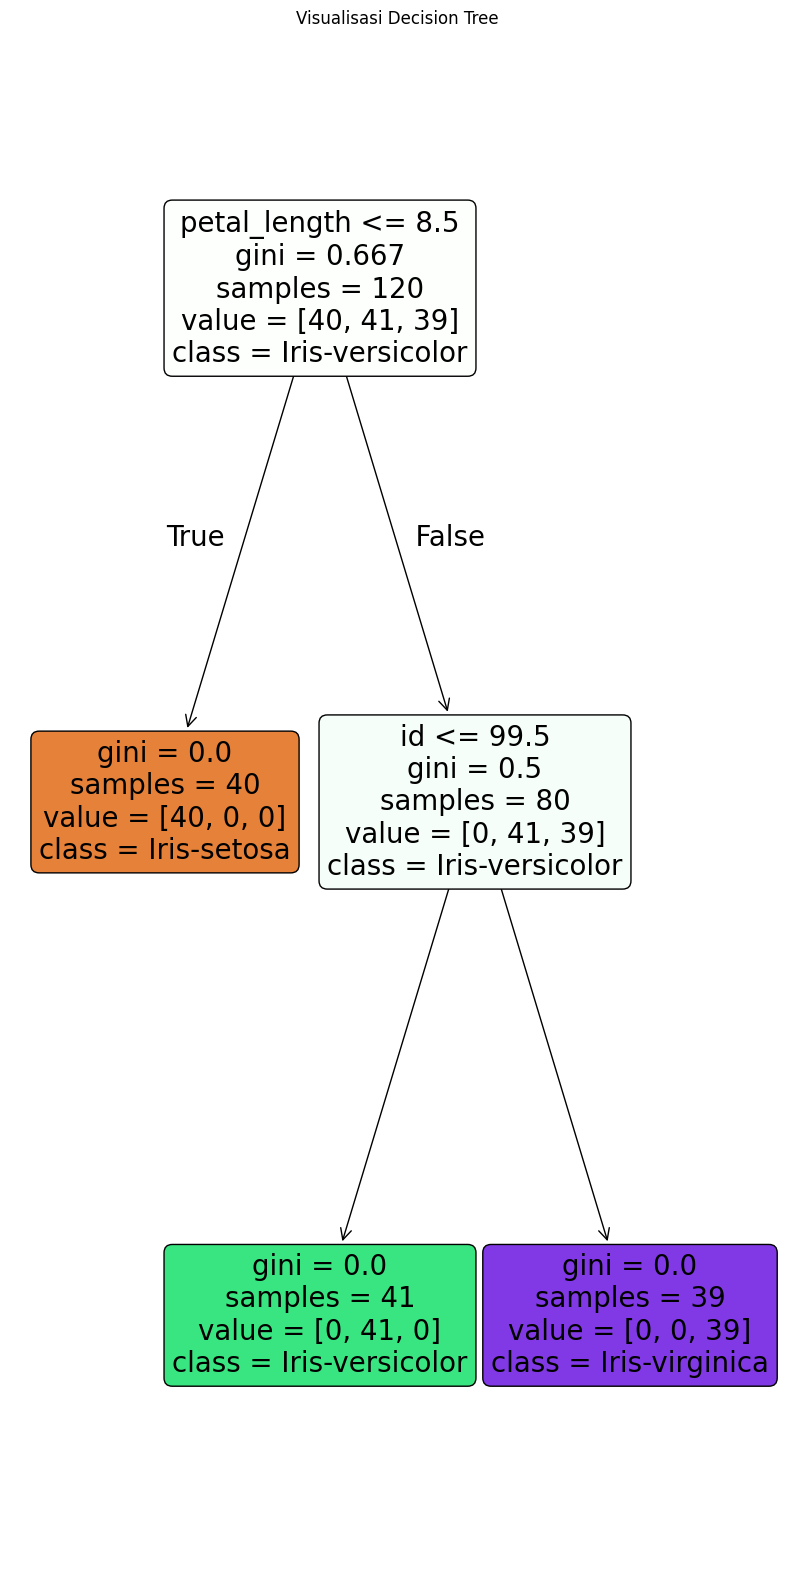

In [33]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


#### Penjelasan Konsep Diskritisasi menggunakan Equal Width Binning


Kode tersebut melakukan diskritisasi data numerik menjadi kategori menggunakan metode Equal-Width Discretization, di mana setiap fitur (panjang dan lebar sepal serta petal) dibagi ke dalam 4 interval dengan lebar yang sama. Nilai-nilai pada setiap fitur kemudian dipetakan ke label kategori A, B, C, atau D tergantung pada intervalnya. Fungsi equiwidth_discretize menghitung batas-batas interval berdasarkan nilai minimum dan maksimum dari data, lalu menetapkan label berdasarkan posisi data dalam interval. Data hasil diskritisasi disimpan dalam df_equal_width, dan kolom kelas asli dari df_merged disisipkan di awal sebagai referensi untuk klasifikasi. Hasil akhir berupa DataFrame yang berisi nilai-nilai kategori untuk setiap fitur dan kelasnya, siap digunakan untuk algoritma seperti Naive Bayes yang bekerja dengan data kategorikal.


In [32]:
import numpy as np
import pandas as pd

# Label kategori (opsional untuk Naive Bayes)
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi diskritisasi Equal-Width
def equiwidth_discretize(arr, m=4):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m
    bin_edges = [min_val + i * width for i in range(m + 1)]
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Terapkan pada df_merged
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df_merged['sepal_length']),
    'sepal_width':  equiwidth_discretize(df_merged['sepal_width']),
    'petal_length': equiwidth_discretize(df_merged['petal_length']),
    'petal_width':  equiwidth_discretize(df_merged['petal_width'])
})

# Tambahkan kolom kelas dari df_merged
df_equal_width.insert(0, 'class', df_merged['class'])

# Tampilkan hasil
print("\n=== Hasil Diskritisasi Equal-Width ===")
print(df_equal_width.to_string(index=False))



=== Hasil Diskritisasi Equal-Width ===
          class sepal_length sepal_width petal_length petal_width
    Iris-setosa            A           C            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            B           D            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            B           C            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A        

## Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width

In [35]:
# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width Binning

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



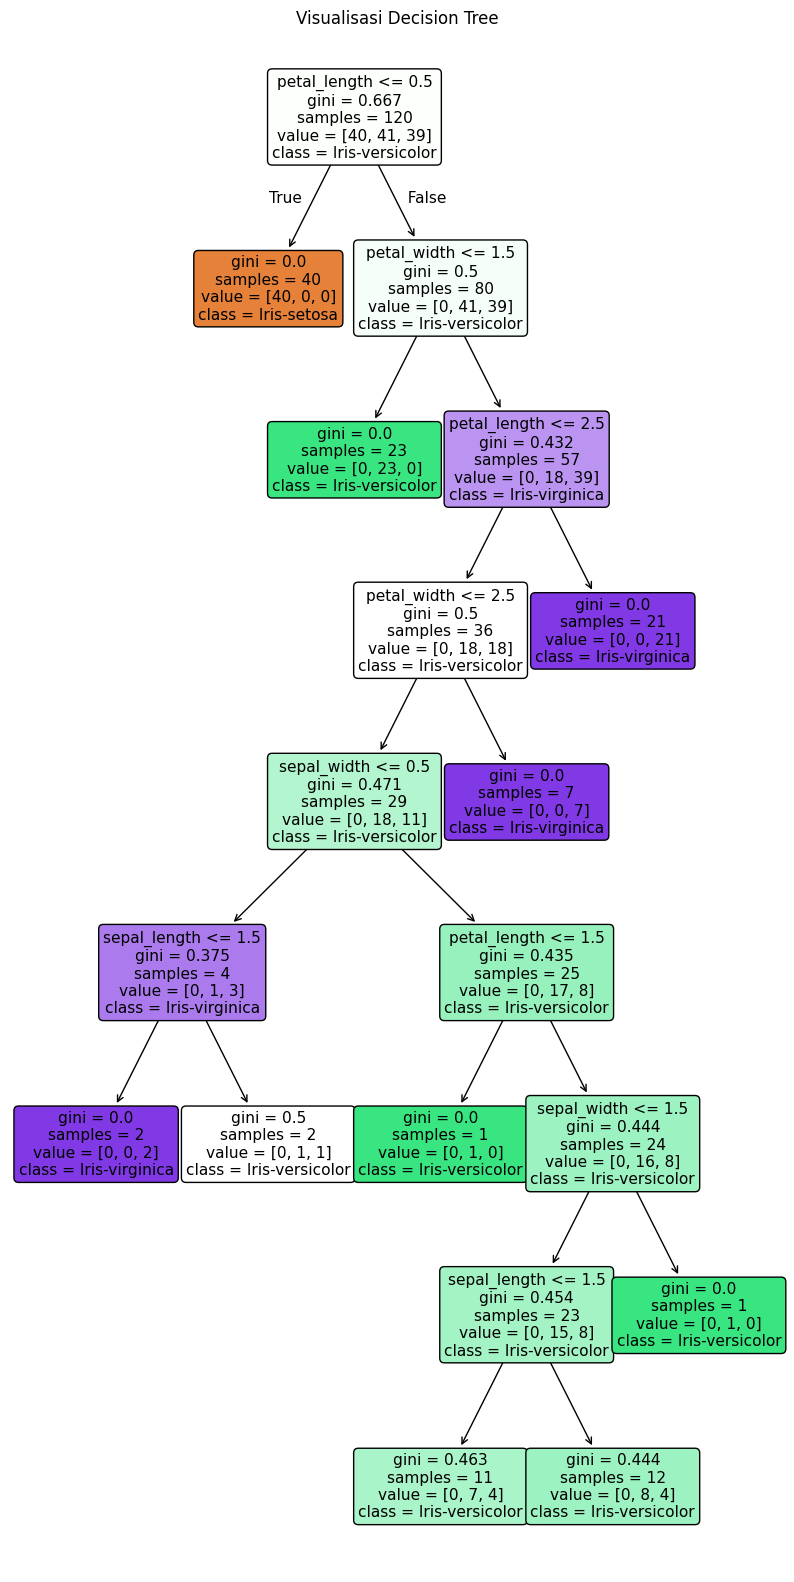

In [36]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


## Diskritisasi Dataset Iris menggunakan Equal-Frequency Binning

Kode tersebut menerapkan metode Equal-Frequency Discretization (diskritisasi frekuensi sama) pada data numerik dengan membaginya ke dalam empat kuantil yang masing-masing berisi jumlah data yang hampir sama. Fungsi discretize_cdf menghitung batas kuantil berdasarkan data yang diurutkan, lalu menentukan nilai ambang dengan interpolasi linear jika diperlukan. Setiap nilai fitur kemudian dikategorikan ke dalam label A, B, C, atau D sesuai dengan interval kuantil tempat nilai tersebut berada. Proses ini dilakukan untuk setiap fitur dalam df_merged (panjang dan lebar sepal serta petal), dan hasilnya disimpan dalam df_equal_freq, dengan kolom kelas asli ditambahkan di awal. Output akhir adalah DataFrame dengan data diskrit yang cocok untuk algoritma klasifikasi berbasis kategori seperti Naive Bayes.










In [38]:
import numpy as np
import pandas as pd

# Label kategori
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi manual equal-frequency discretization (CDF/Quantile)
def discretize_cdf(data, m=4):
    data_sorted = np.sort(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Buat threshold berdasarkan kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        lower = int(np.floor(index))
        upper = int(np.ceil(index))
        frac = index - lower
        if upper >= n:
            val = data_sorted[lower]
        else:
            val = data_sorted[lower] + (data_sorted[upper] - data_sorted[lower]) * frac
        thresholds.append(val)
    thresholds.append(float('inf'))

    # Ubah nilai ke kategori A-D
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break
    return labels

# Terapkan ke semua fitur dari df_merged
df_equal_freq = pd.DataFrame({
    'sepal_length': discretize_cdf(df_merged['sepal_length']),
    'sepal_width':  discretize_cdf(df_merged['sepal_width']),
    'petal_length': discretize_cdf(df_merged['petal_length']),
    'petal_width':  discretize_cdf(df_merged['petal_width'])
})

# Tambahkan label kelas
df_equal_freq.insert(0, 'class', df_merged['class'])

# Tampilkan hasil
print("\n=== Hasil Diskritisasi Equal-Frequency ===")
print(df_equal_freq.to_string(index=False))



=== Hasil Diskritisasi Equal-Frequency ===
          class sepal_length sepal_width petal_length petal_width
    Iris-setosa            B           D            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A           D            A           A
    Iris-setosa            B           D            B           B
    Iris-setosa            A           D            A           B
    Iris-setosa            A           D            A           A
    Iris-setosa            A           B            A           A
    Iris-setosa            A           C            A           A
    Iris-setosa            B           D            A           A
    Iris-setosa            A           D            B           A
    Iris-setosa            A           C            A           A
    Iris-setosa            A    

## lakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan Equal-Frequency Binning, untuk mencari akurasi data iris

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# Gunakan df_equal_freq yang telah dibuat sebelumnya
df_equal_frequency = df_equal_freq  # atau pastikan nama ini digunakan sejak awal

# Encode nilai A-D menjadi angka (0–3)
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Label target
y = df_equal_frequency['class']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes untuk data kategori
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("\n=== Evaluasi Naive Bayes setelah Diskritisasi (Equal-Frequency) ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))



=== Evaluasi Naive Bayes setelah Diskritisasi (Equal-Frequency) ===
Akurasi: 1.0

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



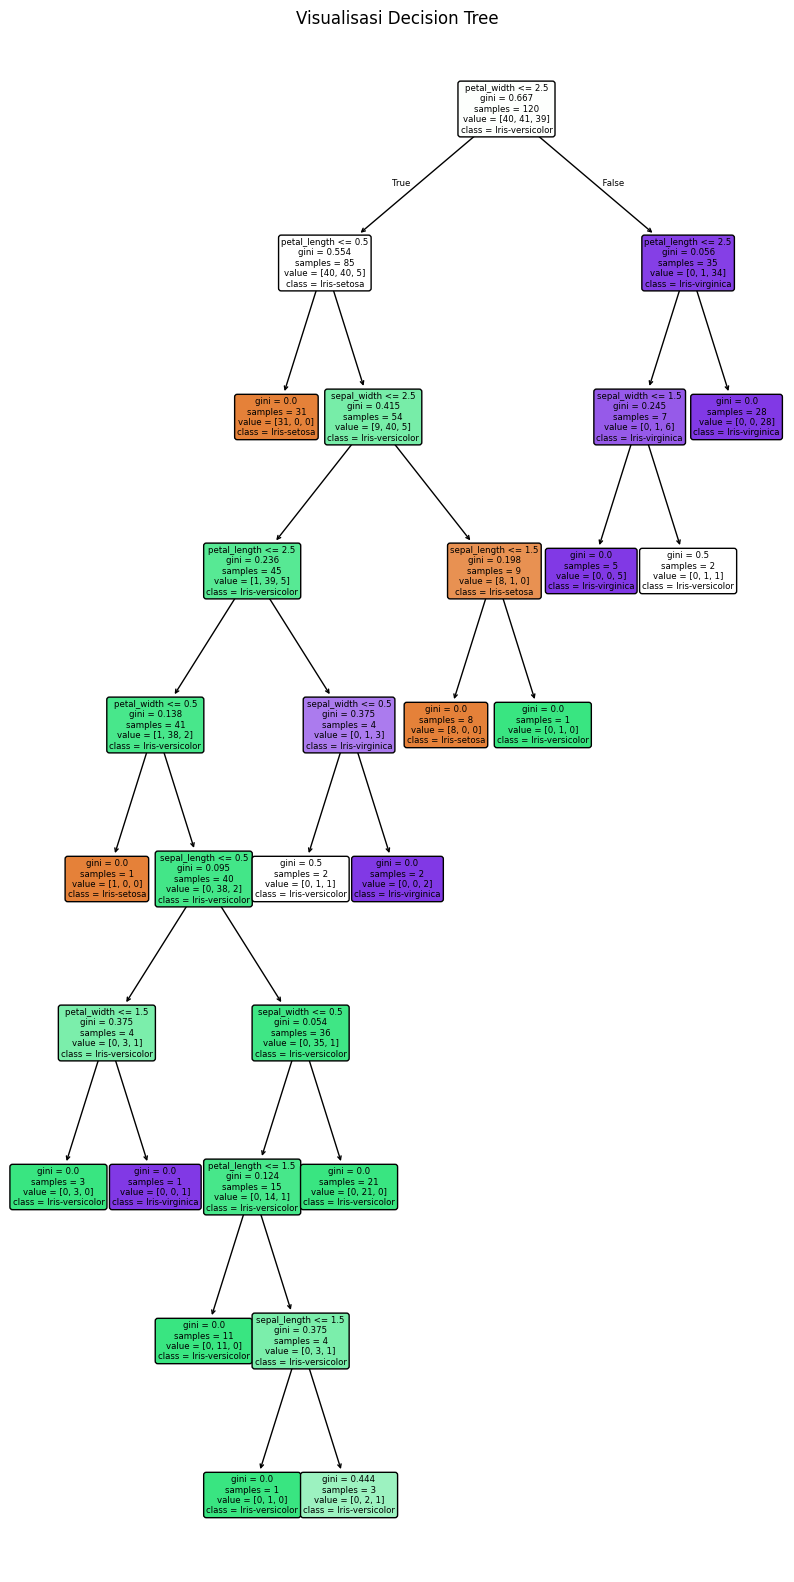

In [41]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


## Import & Ambil Data

In [13]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


In [14]:
def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Gabungkan
df_pg = get_pg_data()
df_mysql = get_mysql_data()
df = pd.merge(df_pg, df_mysql, on=["id", "class"], how="inner")

# Backup numerik
df_numeric = df.copy()


## Diskretisasi
  ### Diskretisasi KMeans

Kode tersebut membuat salinan dari dataset numerik (df_numeric) ke dalam df_ew, lalu menerapkan diskritisasi Equal Width pada setiap fitur (sepal_length, sepal_width, petal_length, dan petal_width) dengan membaginya menjadi 4 interval dengan lebar sama dan memberi label kategori 'a', 'b', 'c', atau 'd'.

In [15]:
df_kmeans = df_numeric.copy()
labels_map = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(df_kmeans[[col]])
    df_kmeans[col] = pd.Series(clusters).map(labels_map)


##  Diskretisasi Equal Width

In [16]:
df_ew = df_numeric.copy()

for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_ew[col] = pd.cut(df_ew[col], bins=4, labels=['a', 'b', 'c', 'd'])


##  Diskretisasi Equal Frequency

Kode tersebut membandingkan akurasi klasifikasi dari empat jenis data: numerik asli, hasil klaster KMeans, dan data yang telah didiskritisasi dengan metode Equal Width dan Equal Frequency. Data kategorikal dikonversi ke angka sebelum diklasifikasikan, dan hasilnya disimpan untuk analisis perbandingan.

In [17]:
df_ef = df_numeric.copy()

for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_ef[col] = pd.qcut(df_ef[col], q=4, labels=['a', 'b', 'c', 'd'])


## Fungsi Klasifikasi

Fungsi run_classification(X, y, title="") digunakan untuk melakukan evaluasi dua algoritma klasifikasi—Naive Bayes (GaussianNB) dan Decision Tree—dengan membandingkan performanya pada dataset fitur X dan target y. Pertama, data dibagi menjadi data latih (70%) dan data uji (30%) secara acak namun konsisten dengan random_state=42. Dua model klasifikasi dibuat dalam dictionary models, lalu masing-masing dilatih pada data latih. Setelah pelatihan, fungsi memprediksi data uji dan menghitung akurasi serta mencetak laporan klasifikasi yang mencakup precision, recall, dan f1-score untuk setiap kelas. Laporan ini membantu menilai kinerja tiap model terhadap distribusi kelas yang berbeda. Akurasi tiap model disimpan dalam dictionary result dan dikembalikan di akhir fungsi. Parameter opsional title ditampilkan dalam output agar pengguna tahu konteks klasifikasi (misalnya, metode diskritisasi yang digunakan).

In [22]:
def run_classification(X, y, title=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }

    result = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"\n=== {name} - {title} ===")
        print(f"Akurasi: {acc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))
        result[name] = acc
    return result


##  Bandingkan Semua

Kode tersebut menjalankan proses klasifikasi dengan menggunakan data dari empat jenis representasi fitur: numerik asli, hasil klasterisasi KMeans, diskritisasi Equal Width, dan diskritisasi Equal Frequency. Untuk setiap versi data, fitur-fitur sepal_length, sepal_width, petal_length, dan petal_width diambil sebagai input (X), dan label kelas (y) diambil dari data numerik asli. Data kategorikal (KMeans, Equal Width, dan Equal Frequency) dikonversi ke bentuk numerik menggunakan .astype('category').cat.codes agar bisa digunakan dalam model klasifikasi. Masing-masing dataset kemudian diproses oleh fungsi run_classification, dan hasilnya disimpan ke dalam dictionary results_all dengan nama sesuai tipe representasinya, memungkinkan perbandingan performa model berdasarkan teknik representasi fitur yang berbeda.

In [23]:
results_all = {}

# Numerik
X_num = df_numeric[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_numeric['class']
results_all['Numerik'] = run_classification(X_num, y, "Numerik")

# KMeans
X_kmeans = df_kmeans[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(lambda col: col.astype('category').cat.codes)
results_all['KMeans'] = run_classification(X_kmeans, y, "KMeans")

# Equal Width
X_ew = df_ew[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(lambda col: col.astype('category').cat.codes)
results_all['Equal Width'] = run_classification(X_ew, y, "Equal Width")

# Equal Frequency
X_ef = df_ef[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(lambda col: col.astype('category').cat.codes)
results_all['Equal Frequency'] = run_classification(X_ef, y, "Equal Frequency")



=== Naive Bayes - Numerik ===
Akurasi: 0.9778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45


=== Decision Tree - Numerik ===
Akurasi: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


=== Naive Bayes - KMeans ===
Akurasi: 0.8000
                 precision    recall  f1-score   suppo

## Visualisasi Perbandingan


===== PERBANDINGAN AKURASI =====
                 Naive Bayes  Decision Tree
Numerik             0.977778       1.000000
KMeans              0.800000       0.955556
Equal Width         0.800000       0.933333
Equal Frequency     0.844444       0.933333


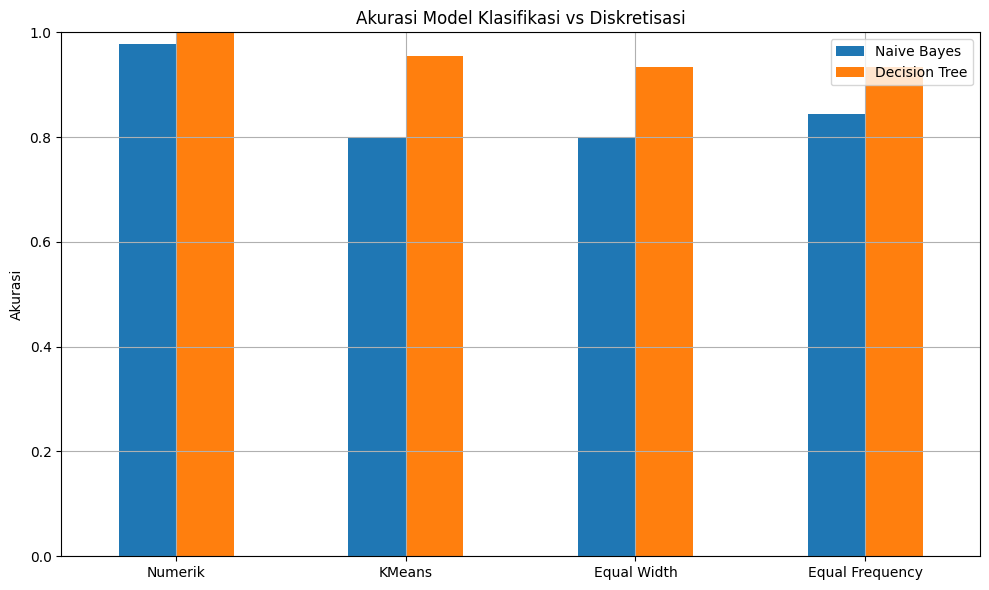

In [21]:
results_df = pd.DataFrame(results_all).T
print("\n===== PERBANDINGAN AKURASI =====")
print(results_df)

results_df.plot(kind='bar', figsize=(10,6), title="Akurasi Model Klasifikasi vs Diskretisasi")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
